In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
dataset=pd.read_csv("Weather1.csv")
dataset

,TIME1,TIME,HUMIDITY,TEMPERATURE,ABSOLUTE PRESSURE,PRESSURE IN HG,SEALEVEL PRESSURE,SEA LEVEL PRESSURE IN HG
0,1,[2019-10-31 19:16:01.414],69.0,26.3,915.76,27.05 inHg,939.24,27.74 inHg
1,2,[2019-10-31 19:20:46.462],77.0,26.1,916.67,27.07 inHg,940.17,27.77 inHg
2,3,[2019-10-31 19:30:46.919],77.0,26.0,919.63,27.16 inHg,943.20,27.86 inHg
3,4,[2019-10-31 19:40:47.380],87.0,25.4,920.54,27.19 inHg,944.13,27.88 inHg
4,5,[2019-10-31 19:50:47.836],89.0,25.2,920.61,27.19 inHg,944.21,27.89 inHg
...,...,...,...,...,...,...,...,...
319,320,[2019-11-03 04:56:47.907],86.4,25.7,910.48,26.89 inHg,933.82,27.58 inHg
320,321,[2019-11-03 05:06:48.337],90.5,25.6,910.48,NaN,933.82,NaN
321,322,[2019-11-03 05:16:48.750],87.6,25.7,909.94,26.87 inHg,933.27,27.56 inHg
322,323,[2019-11-03 05:26:49.164],90.6,25.6,908.11,26.82 inHg,931.39,27.51 inHg


In [32]:
#Importing training set
train = dataset.iloc[:,2:3].values


In [33]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))#All the prizes would be between 0 and 1
train_scaled = sc.fit_transform(train)

In [34]:
#Creating a data structre with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(24,324):
    x_train.append(train_scaled[i-24:i,0])
    y_train.append(train_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
#Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [36]:
#BUILDING THE RNN

#Importing Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [37]:
#Initializing RNN
regressor = Sequential()

In [38]:
#Adding first layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape =  (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [39]:
#Adding second layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [40]:
#Adding third layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [41]:
#Adding fourth layer and Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [42]:
#Adding Output Layer
regressor.add(Dense(units = 1))

In [43]:
#Compiling RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [44]:
# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size= 32  )


Epoch 1/100
10/10 [==============================] - 16s 69ms/step - loss: 0.2502
Epoch 2/100
10/10 [==============================] - 1s 68ms/step - loss: 0.0628
Epoch 3/100
10/10 [==============================] - 1s 67ms/step - loss: 0.0432
Epoch 4/100
10/10 [==============================] - 1s 71ms/step - loss: 0.0357
Epoch 5/100
10/10 [==============================] - 1s 72ms/step - loss: 0.0369
Epoch 6/100
10/10 [==============================] - 1s 68ms/step - loss: 0.0334
Epoch 7/100
10/10 [==============================] - 1s 70ms/step - loss: 0.0322
Epoch 8/100
10/10 [==============================] - 1s 68ms/step - loss: 0.0316
Epoch 9/100
10/10 [==============================] - 1s 69ms/step - loss: 0.0319
Epoch 10/100
10/10 [==============================] - 1s 75ms/step - loss: 0.0327
Epoch 11/100
10/10 [==============================] - 1s 73ms/step - loss: 0.0305
Epoch 12/100
10/10 [==============================] - 1s 71ms/step - loss: 0.0295
Epoch 13/100
10/10 [====

In [45]:
#MAKING PREDICTIONS

data_test = pd.read_csv('weather2.csv')
data_test

,TIME1,TIME,HUMIDITY,TEMPERATURE,ATM PRESSURE,PRESSURE IN HG,SEA LEVER P,SLP IN HG
0,325,5:46,85.0,26.0,907.97,26.82 inHg,931.25,27.50 inHg
1,326,5:56,86.5,26.0,908.35,26.83 inHg,931.63,27.51 inHg
2,327,6:06,87.9,26.0,907.90,26.81 inHg,931.17,27.50 inHg
3,328,6:16,84.4,26.1,907.73,26.81 inHg,931.00,27.50 inHg
4,329,6:26,83.5,26.2,907.44,26.80 inHg,930.70,27.49 inHg
5,330,6:36,84.5,26.1,907.35,26.80 inHg,930.61,27.48 inHg
6,331,6:46,81.8,26.1,906.46,26.77 inHg,929.70,27.46 inHg
7,332,6:56,79.5,26.2,907.46,26.80 inHg,930.72,27.49 inHg
8,333,7:06,80.6,26.2,906.88,26.78 inHg,930.12,27.47 inHg
9,334,7:16,78.3,26.2,906.81,26.78 inHg,930.05,27.47 inHg


In [46]:
real_humidity = data_test.iloc[:,2:3].values
real_humidity


array([[85. ],
       [86.5],
       [87.9],
       [84.4],
       [83.5],
       [84.5],
       [81.8],
       [79.5],
       [80.6],
       [78.3],
       [79.4],
       [77.6],
       [79.1],
       [80.3],
       [76.1],
       [73.9],
       [78.5],
       [77.4],
       [75.3],
       [77.1],
       [77.5],
       [78.2],
       [79.8],
       [75.2],
       [78.1],
       [74.9],
       [74.6],
       [77.6]])

In [47]:
#Getting Humidity
dataset_total = pd.concat((dataset['HUMIDITY'], data_test['HUMIDITY']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 24: ].values
inputs = inputs.reshape(-1 ,1)# It will put everything in one clolumn since we didn't use iloc
inputs = sc.transform(inputs)
x_test = []
for i in range(24, 52):
    x_test.append(inputs[i-24:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_humidity = regressor.predict(x_test)
predicted_humidity = sc.inverse_transform(predicted_humidity)


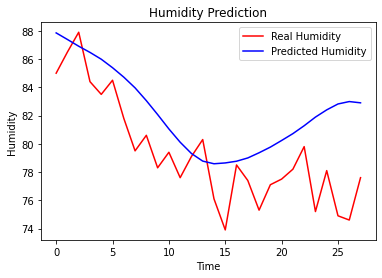

In [48]:
# Visualising the results
plt.plot(real_humidity, color = 'red', label = 'Real Humidity')
plt.plot(predicted_humidity, color = 'blue', label = 'Predicted Humidity')
plt.title('Humidity Prediction')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.show()